# Limiting case 1 for JAERI model

In this case, it is true that $\frac{4k_1YR}{(k_2C)^2}\ll1$ for all $x$. This means that the rate of the reaction is never too high and the oxygen can be replenished by diffusion. The concentratioin should experience only a small decrease in the center of the sample that can be approximated via the following equation:
\begin{equation}
1 - y = \beta\left(\frac{1}{4} - \lambda^2\right),
\end{equation}
where $\beta=\frac{YRl^2}{2DC_0}$ with $l$ being the length of the sample, $\lambda$ being the distance from the center of the sample, $C_0$ being the initial concentration of the reactant, $D$ being the diffusion coefficient of the reactant, $Y$ being the yield of the reaction, and $R$ being the dose rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplhep as hep

In [2]:
hep.style.use(hep.style.CMS)

The normalized concentration $y$ from Eq. 1:

In [3]:
y = lambda x, beta: 1 - beta * (0.25 - x**2)

Solving and plotting for a range of values of the parameter $\beta$. The sensible range for this parameter is $[0,4]$. $0$ is no reaction at all and $4$ means the reaction rate is high enough that $y=0$ at the center of the material. This description makes no sense for values above $4$.

In [4]:
x = np.linspace(0, 0.5, 100)
beta = np.linspace(0, 4, 20)
sols = [y(x, b) for b in beta]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

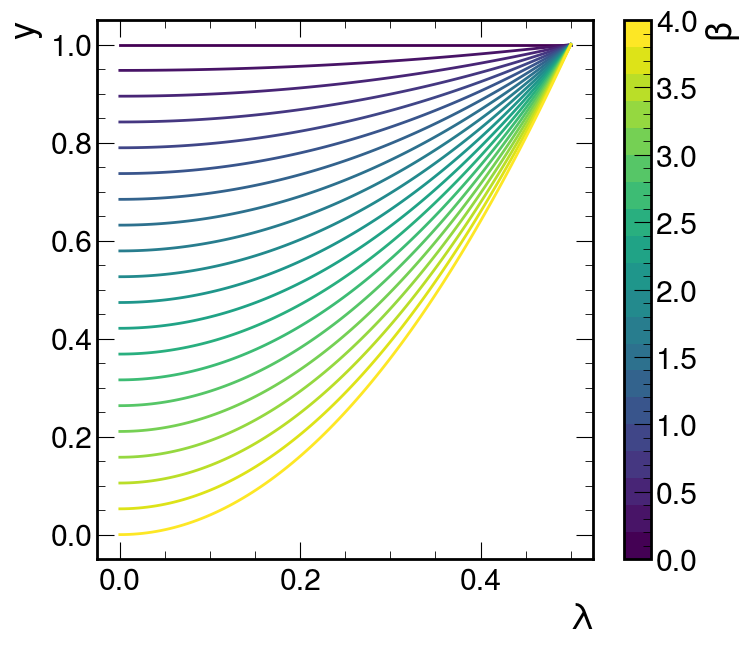

In [5]:
%matplotlib inline

plt.tight_layout()
cmap = plt.get_cmap("viridis", 20)
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
for i, sol in enumerate(sols):
    plot = ax.plot(x, sol, lw=2, color=cmap(i))
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$y$")
norm = colors.Normalize(vmin=0, vmax=4)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label=r"$\beta$", orientation="vertical")
fig.savefig("plots/fig2.pdf")
plt.show